In [1]:
import pandas as pd
import numpy as np

##plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#NLP packages
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re

#Wordcloud Modules
from wordcloud import WordCloud
from wordcloud import STOPWORDS

#Machine learning modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [2]:
df1 = pd.read_csv('Sheet_1.csv', encoding="ISO-8859-1")
df2 = pd.read_csv('Sheet_2.csv', encoding="ISO-8859-1")

In [3]:
df1.head()

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN


In [4]:
df2.head()

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...


In [5]:
df = df1.merge(df2)


In [6]:
df.drop(['Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7'],inplace= True,axis=1)

In [7]:
df.sample(14)

,response_id,class,response_text,resume_id,resume_text
1097,response_19,not_flagged,A friend that is a girl and just talk to her t...,resume_114,\nBennington VT - Email me on Indeed: indeed.c...
5679,response_60,flagged,I've had some friends come to me saying people...,resume_107,Swaminathan Prasanna Senior UI Developer - ATS...
2300,response_40,not_flagged,I don't think I'm qualified to be a serious re...,resume_1,\rCustomer Service Supervisor/Tier - Isabella ...
1746,response_31,not_flagged,I am a high school teacher so almost everyday.,resume_123,\rMedical Coder - Highly Skilled - Entry Level...
5325,response_23,flagged,Having gone through depression and anxiety mys...,resume_8,Statistician\rBurlington VT - Email me on Inde...
3471,response_55,not_flagged,I care about other people more than myself so ...,resume_91,Rebecca Mulheron\rBurlington VT - Email me on ...
719,response_14,not_flagged,Never,resume_99,Sebastian Castro\rEnosburg Falls VT - Email me...
5830,response_77,flagged,when my best friends mom past away from od'ing...,resume_34,Erik McCullen Senior Scientist/Engineer\rFairf...
2602,response_44,not_flagged,Describe? Nah,resume_41,George Slusser Advisory Engineer\rMilton VT - ...
5775,response_73,flagged,Ex girlfriend had depression and anxiety. I us...,resume_88,Nisha Chaube Graduate Teaching Assistant\rColc...


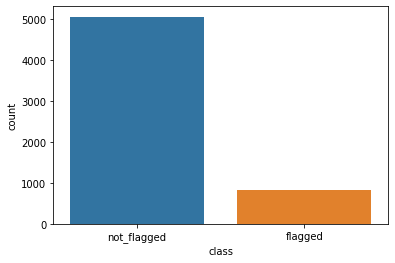

In [8]:
sns.countplot(data = df , x = "class")

In [9]:
df['class'].replace({"flagged":1,"not_flagged":0},inplace=True)
df

,response_id,class,response_text,resume_id,resume_text
0,response_1,0,I try and avoid this sort of conflict,resume_1,\rCustomer Service Supervisor/Tier - Isabella ...
1,response_1,0,I try and avoid this sort of conflict,resume_2,\rEngineer / Scientist - IBM Microelectronics ...
2,response_1,0,I try and avoid this sort of conflict,resume_3,\rLTS Software Engineer Computational Lithogra...
3,response_1,0,I try and avoid this sort of conflict,resume_4,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,response_1,0,I try and avoid this sort of conflict,resume_6,\rPoultney VT - Email me on Indeed: indeed.com...
...,...,...,...,...,...
5880,response_79,1,My now girlfriend used to have serious addicti...,resume_115,Ph.D.\rSouth Royalton VT - Email me on Indeed...
5881,response_79,1,My now girlfriend used to have serious addicti...,resume_116,\rEssex Jct VT - Email me on Indeed: indeed.co...
5882,response_79,1,My now girlfriend used to have serious addicti...,resume_118,\rSpatial Analyst and UAV Flight Operator - Sp...
5883,response_79,1,My now girlfriend used to have serious addicti...,resume_119,| Bioinformatics Analyst\rBurlington VT - Ema...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5885 entries, 0 to 5884
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   response_id    5885 non-null   object
 1   class          5885 non-null   int64 
 2   response_text  5885 non-null   object
 3   resume_id      5885 non-null   object
 4   resume_text    5885 non-null   object
dtypes: int64(1), object(4)
memory usage: 404.9+ KB


In [11]:
df.groupby('class').describe(include = 'O') # include = 'O' Object yapılarını da dahil etmek için


response_id                         response_text         \
            count unique         top freq         count unique   
class                                                            
0            5060     55  response_1   92          5060     55   
1             825     25  response_2   33           825     25   

                                                              resume_id  \
                                                     top freq     count   
class                                                                     
0                  I try and avoid this sort of conflict   92      5060   
1      Had a friend open up to me about his mental ad...   33       825   

                            resume_text         \
      unique       top freq       count unique   
class                                            
0         92  resume_1   55        5060     92   
1         33  resume_5   25         825     33   

                                                               
                                                     top freq  
class                                                          
0      \rCustomer Service Supervisor/Tier - Isabella ...   55  
1      \rIndependent Consultant - Self-employed\rBurl...   25

In [12]:
flagged = df.query( "`class`==1")['response_text']
not_flagged = df.query( "`class` == 0")['response_text']

In [13]:
flagged

5060    Had a friend open up to me about his mental ad...
5061    Had a friend open up to me about his mental ad...
5062    Had a friend open up to me about his mental ad...
5063    Had a friend open up to me about his mental ad...
5064    Had a friend open up to me about his mental ad...
                              ...                        
5880    My now girlfriend used to have serious addicti...
5881    My now girlfriend used to have serious addicti...
5882    My now girlfriend used to have serious addicti...
5883    My now girlfriend used to have serious addicti...
5884    My now girlfriend used to have serious addicti...
Name: response_text, Length: 825, dtype: object

In [14]:
def words_cleaner(data):
    words = [re.sub('[^a-zA-Z]',' ',i) for i in df['response_text']]
    words = [i.lower() for j in data for i in j.split()] ## splitting all the sentences into words
    words = [i for i in words if not i in set(stopwords.words('english'))] #removing stopwords
    words = [i for i in words if len(i)>2] #removing words with less than two characters
    return words

In [15]:
flagged=words_cleaner(flagged)
flagged_freq=nltk.FreqDist(flagged)
flagged_freq=pd.DataFrame(flagged_freq.most_common(10),
                           columns=['Top_Words','Frequency'])

In [16]:
not_flagged=words_cleaner(not_flagged)
not_flagged_freq=nltk.FreqDist(not_flagged)
not_flagged_freq=pd.DataFrame(not_flagged_freq.most_common(10),
                           columns=['Top_Words','Frequency'])

In [17]:
flagged_freq

,Top_Words,Frequency
0,friend,429
1,people,297
2,friends,264
3,get,198
4,helped,198
5,help,198
6,would,198
7,going,165
8,talk,165
9,depression,165


In [18]:
not_flagged_freq

,Top_Words,Frequency
0,friends,1288
1,people,1012
2,friend,920
3,helped,828
4,talk,644
5,help,644
6,someone,552
7,lot,552
8,try,460
9,think,460


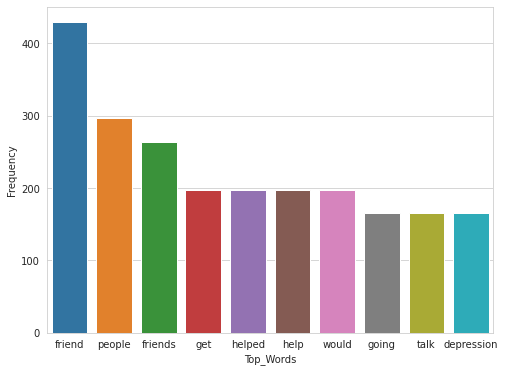

In [19]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
ax=sns.barplot(x='Top_Words',y='Frequency',data=flagged_freq)

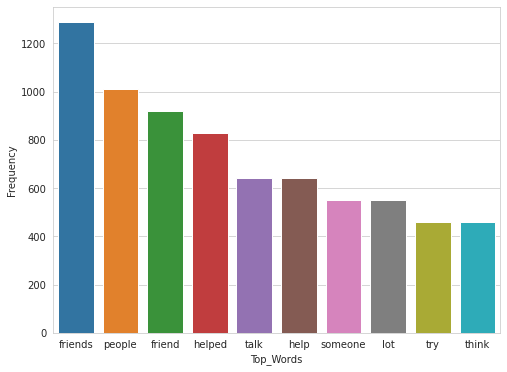

In [20]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
ax=sns.barplot(x='Top_Words',y='Frequency',data=not_flagged_freq)

# Word Cloud

In [21]:
def wc(data,bgcolor):
    plt.figure(figsize = (10,10))
    wc=WordCloud(background_color=bgcolor,max_words=100)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

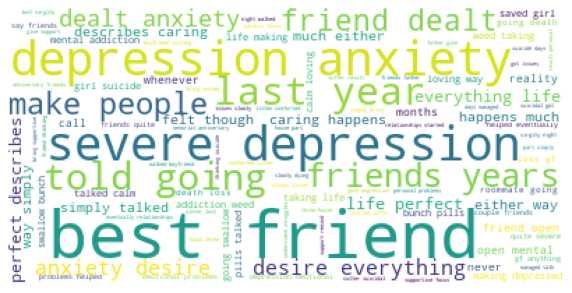

In [22]:
wc(flagged,'white') #wc =word cloud

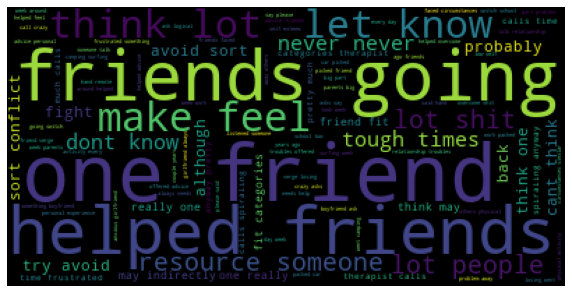

In [23]:
wc(not_flagged,'black') 

## NLP

Steps to take in NLP

1-All sentences will be converted to lowercase

2-remove punctuation

3-remove digits

4- remove line break \n \r

-remove stop words, unnecessary words

-Tokenize

-lemma and stemma -remove attachments and find roots

-with vectorizer we assign the texts to numbers

In [24]:
def features_cleaner(data):
    clean_txt = []
    for i in range(0,len(data)):
        text = re.sub('[^a-zA-Z]',' ', data[i])
        text=text.lower()
        text=text.split()
        ps=PorterStemmer()
        text= [ps.stem(j) for j in text if not j in set(stopwords.words('english'))]
        text= ' '.join(text)
        clean_txt.append(text)
    return clean_txt

In [25]:
X = features_cleaner(df['response_text'])
y = df['class']

In [26]:
X

['tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort conflict',
 'tri avoid sort con

In [27]:
cv = CountVectorizer() #dummy variables'ın gelişmiş hali
X = cv.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=50)

In [28]:
pd.DataFrame(X_train)

,0
0,"(0, 418)\t1\n (0, 330)\t1\n (0, 171)\t1\n ..."
1,"(0, 217)\t1\n (0, 170)\t1\n (0, 162)\t1\n ..."
2,"(0, 62)\t1\n (0, 242)\t1\n (0, 59)\t1\n (..."
3,"(0, 62)\t1\n (0, 242)\t1\n (0, 59)\t1\n (..."
4,"(0, 157)\t1\n (0, 187)\t2\n (0, 242)\t1\n ..."
...,...
4408,"(0, 62)\t1\n (0, 418)\t2\n (0, 293)\t1\n ..."
4409,"(0, 418)\t1\n (0, 330)\t1\n (0, 171)\t1\n ..."
4410,"(0, 62)\t1\n (0, 242)\t1\n (0, 59)\t1\n (..."
4411,"(0, 157)\t1\n (0, 166)\t1\n (0, 22)\t1\n ..."


In [29]:
classifier=MultinomialNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [30]:
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix

array([[1265,    0],
       [   0,  207]])

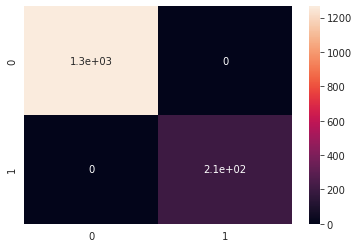

In [31]:
sns.heatmap(cf_matrix, annot = True)

In [32]:
accuracy_score(y_pred,y_test)

1.0

In [33]:
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()

In [34]:
r.fit(X_train, y_train)
y_pred = r.predict(X_test)

In [35]:
r_matrix = confusion_matrix(y_test,y_pred)
r_matrix

array([[1265,    0],
       [   0,  207]])

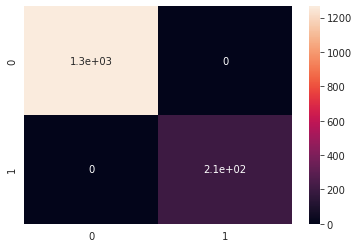

In [36]:
sns.heatmap(r_matrix, annot = True)